# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [ ]:
pip install ydata-profiling

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

```
🟡 Random.seed() мы фиксируем для получения воспроизводимого результата, то есть, чтобы при каждом запуске мы использовали одну и ту же "компанию" случайных чисел
```

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [63]:
import pandas as pd

In [64]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- ✅ Отобразите 30 случайных строк тренировочного датасета.
- ✅ Отобразите первые 5 и последние 5 объектов тестового датасета
- ✅ Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- ✅ Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- ✅ Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- ✅ Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- ✅ Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)



```
 🟡 Отображение 30 случайных чисел df_train при помощи dataframe_name.sample(n), где n - количество случайных строк. При фиксации некоторого числа и последующих запусков ячейки числа будут изменяться
```





In [65]:
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0




```
🟡 dataframe_name.head(n) - отображает n первых объектов датасета
🟡 dataframe_name.tail(n) - отображает n последних объектов датасета
```



In [66]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [67]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0




```
📌 Вывод: Команды .head(), tail(), sample() позволяют первично и визуально ознакомиться с данными, условно пощупать какие есть признаки, какими значениями они представлены. Этими командами мы "вырываем" с разных мест строки с набором данных и просматриваем структуру. Но мы не можем точно сказать ни об одной характеристике, например, мы видим несколько пропусков, но данные команды не позволят оценить сколько пропусков во всем датасете или определить медиану во всем датасете, возможные скрытые аномалии. Ответы на эти точечные вопросы нужно искать с помощью других команд
```





```
🟡 dataframe_name.isna().sum() - подсчитывает сумму пропусков по каждому столбцу в датасете
```



In [68]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202




```
📌 Вывод: Согласно полученным значениям пропуски наблюдаются в столбцах под названием `mileage`, `engine`, `max_power`, `torque`, `seats`
```



```
🟡 dataframe_name.dublicated().sum() - подсчитываем количество дубликатов
```

In [69]:
df_train.duplicated().sum()

np.int64(985)

In [70]:
df_test.duplicated().sum()

np.int64(62)



```
📌 Вывод: команда .duplicated() недостаточна для анализа дубликатов, поскольку она показывает только их наличие, но не отвечает на вопрос, как они возникли, а точно ли они являются дубликатами или это идентичные строки о разном объекте?
```



```
🟡 Построение дашборда, используя ydata-profilling:
```

In [12]:
from ydata_profiling import ProfileReport

df_copy = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')

profile_report = ProfileReport(df_copy, title="Pandas Profiling Report")

In [ ]:
profile_report # для просмотра с Google Colab

In [13]:
profile_report.to_file('Cars_report.html') # для загрузки в формате .html

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 25.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- ✅ Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

```
📌 Для выполнения данного пункта необходимо разделить датасет на тренировочный и тестовый. Далее рассчитываем медианные значения по столбцам mileage, engine, max_power, torque, seats, используем эти значения для заполнения так тренировочной, так и тестовой выборки. Деление необходимо для того, чтобы избежать data leak, модель должна обучаться на тренировочной выборке, а тестироваться на тестовой, для успешного прохождения данного рубежа видеть данные на тесте она не должна
```

```
📌 Важно: для работы с медианным значением у столбцов с пропусками необходимо их избавить от цифро-буквенных значений: для mileage - удаляем kmpl, для engine - СС, max_power - bhp.

```

In [72]:
# В процессе удаления пропусков столкнулась с проблемой, что у столбцов mileage, engine, max_power помимо численного значения присутствует единица измерения
# Для решения этой проблемы я удалю единицы измерения как 'kmpl', 'CC', 'bhp'
# Со столбцом torque все неочевидно: помимо того, что крутящий момент представлен двумя значениями, так и еще и сила обозначена в Нм или кг (что требует домножения на 9,81)
# Пока что не знаю, как решать вопрос с заполнением torque, поэтому этот столбец в последующих пунктах удалю совсем (посмотрела пункты дальше, где его рекомендуют удалить)
# По torque у меня есть некоторое представление: разделить это значение знаком @, выделить левое и правое значение, разместить их по двум столбцам и просчитать медиану, заполнить пропуски

import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

# Преобразуем столбец mileage (23.4 kmpl >> 23.4 or 18.3 km/kg >> 18.3)
df_train['mileage'] = (
    df_train['mileage']
    .str.replace(' kmpl', '', regex=False)
    .str.replace(' km/kg', '', regex=False)
)
df_test['mileage'] = (
    df_test['mileage']
    .str.replace(' kmpl', '', regex=False)
    .str.replace(' km/kg', '', regex=False)
)
df_train['mileage'] = pd.to_numeric(df_train['mileage'], errors='coerce')
df_test['mileage'] = pd.to_numeric(df_test['mileage'], errors='coerce')

# Преобразуем столбец engine (1248 CC >> 1248)
df_train['engine'] = df_train['engine'].str.replace(' CC', '', regex=False)
df_test['engine'] = df_test['engine'].str.replace(' CC', '', regex=False)

df_train['engine'] = pd.to_numeric(df_train['engine'], errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'], errors='coerce')

# Преобразуем столбец max_power (74 bhp >> 74)
df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '', regex=False)
df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '', regex=False)

df_train['max_power'] = pd.to_numeric(df_train['max_power'], errors='coerce')
df_test['max_power'] = pd.to_numeric(df_test['max_power'], errors='coerce')

# Заполняем пропуски
for column in ['mileage', 'engine', 'max_power', 'seats']:
    # Вычисляем медианное значение в выборке df_train
    median_value = df_train[column].median()

    df_train[column] = df_train[column].fillna(median_value)
    df_test[column] = df_test[column].fillna(median_value)


### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частичным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- ✅ Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- ✅ Отобразите такие объекты (0.15 балла)
- ✅ Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- ✅  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [73]:
# Код в этой ячейке сгенерирован при помощи нейросети

# Удаляем целевую переменную
features = df_train.drop('selling_price', axis=1)

# Выполняем подсчет количества строк, участвующих в частичных дубликатах
number_duplicates = features.duplicated(keep=False).sum()
print(f"Количество строк, участвующих в частичных дубликатах: {number_duplicates}")

# Отображаем первые 10 таких объектов
duplicates_mask = features.duplicated(keep=False)
if number_duplicates > 0:
    print("\nПримеры частичных дубликатов (первые 10):")
    display(df_train[duplicates_mask].head(10))
else:
    print("Частичных дубликатов не найдено.")

# Удаляем дубликаты, оставляя первую строку
df_train = df_train.drop_duplicates(
    subset=features.columns.tolist(),
    keep='first'
).reset_index(drop=True)

# Обновляем индексы
print(f"\nПосле удаления: {df_train.shape}")

Количество строк, участвующих в частичных дубликатах: 1799

Примеры частичных дубликатов (первые 10):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.80,796.0,34.20,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.30,1248.0,82.00,NaN,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796.0,35.00,6.1kgm@ 3000rpm,5.0
31,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,60Nm@ 3500rpm,4.0
32,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.10,90Nm@ 3500rpm,5.0
33,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.00,1591.0,121.30,151Nm@ 4850rpm,5.0
35,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93,2179.0,138.03,320Nm@ 1700-2700rpm,7.0
36,Maruti 800 Std,2012,150000,76000,Petrol,Individual,Manual,First Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4.0



После удаления: (5840, 13)


In [30]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* ✅ Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* ✅ Приведите тип данных к ``float``.
* ✅ Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

```
📌 Ранее в пункте по заполнению пропусков при помощи медианного значения для обоих датасетов по отдельности (для двух датасетов - df_train, df_test)я уже выполняла действие с удалением единиц измерения для столбцов 'mileage', 'engine', 'max_power', они также преобразованы к типу float.
Поэтому в этом пункте я буду просто удалять столец 'torque' (пока я еще не имею представления, как его преобразовать)
```

In [74]:
# Еще раз посмотрим на отсутствие пропусков и приведения столбцов с единицами измерения к типу float

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5653 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 593.3+ KB


In [75]:
# Удаляем столбец torque из train и test
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

# Проверим тот факт, что мы удалили столбец torque, то есть на выходе я должна получить train - (5840, 12), test - (1000, 12)
print("Updated df_train:", df_train.shape)
print("Updated df_test:", df_test.shape)

Updated df_train: (5840, 12)
Updated df_test: (1000, 12)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- ✅ Осуществите приведение столбцов к необходимому типу.

In [76]:
# Приведем столбцы engine и seats к int в двух датасетах, поскольку они действительно принимают значения только в целых числах
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# Проверим типы после преобразования
print(df_train[['engine', 'seats']].dtypes)

print('---------------------')

print(df_test[['engine', 'seats']].dtypes)

engine    int64
seats     int64
dtype: object
---------------------
engine    int64
seats     int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- ✅ Посчитайте основные статистики по числовым столбцам для трейна и теста
- ✅ Посчитайте основные статистики по категориальным столбцам для трейна и теста
- ✅ Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

```
📌 Считаю, что в данном контексте мы внесли минимальные косметические правки, поэтому обзор статистики после преобразований не критичен
```

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


In [78]:
# Рассмотрим числовую статистику по df_train
print (f'Статистика по числовым столбцам для df_train')
df_train.describe().T

Статистика по числовым столбцам для df_train


,count,mean,std,min,25%,50%,75%,max
year,5840.0,2013.428425,4.095622,1983.0,2011.00,2014.00,2017.0,2020.0
selling_price,5840.0,522960.091096,535432.001912,29999.0,250000.00,405000.00,640000.0,10000000.0
km_driven,5840.0,73952.242466,60071.136504,1.0,39000.00,70000.00,100000.0,2360457.0
mileage,5840.0,19.428611,3.986026,0.0,16.95,19.30,22.3,42.0
engine,5840.0,1429.448973,485.662834,624.0,1197.00,1248.00,1498.0,3604.0
max_power,5840.0,87.910782,31.639585,0.0,68.00,81.86,99.0,400.0
seats,5840.0,5.426712,0.982344,2.0,5.00,5.00,5.0,14.0


In [79]:
# Рассмотрим числовую статистику по df_test
print (f'Статистика по числовым столбцам для df_test')
df_test.describe().T

Статистика по числовым столбцам для df_test


,count,mean,std,min,25%,50%,75%,max
year,1000.0,2013.68100,4.012149,1995.0,2011.00,2014.000,2017.0,2020.00
selling_price,1000.0,617901.04200,758553.860710,31000.0,250000.00,434999.000,670000.0,6000000.00
km_driven,1000.0,71393.34100,48486.218662,1303.0,37000.00,61500.000,100000.0,375000.00
mileage,1000.0,19.33748,3.951751,0.0,16.55,19.300,22.3,32.26
engine,1000.0,1454.87600,521.995740,624.0,1197.00,1248.000,1582.0,3604.00
max_power,1000.0,90.84433,34.892709,34.2,69.00,82.425,102.0,280.00
seats,1000.0,5.40300,0.912921,4.0,5.00,5.000,5.0,9.00


``
📌Выводы по обзору статистики по числовым столбцам
`df_train`

*   Значение count = 5840 во всех столбцах говорит об отсутствии пропусков
*   Для `year` границы расположились между 1995 и 2020 годами, при этом средний год выпуска автомобиля 2014 год (относительно новые автомобили)
*   Для `selling price` (цены автомобиля) диапазон расположился от 29999 до 10 млн, при этом средняя стоимость равна 617901 ус.ед, а с учетом того, что 50% квартиль равен 434999, то можно сказать, что цены выше среднего (распределение цен вплодь до 10 млн увеличивает среднее). Также стоит отметить, что и стандартное отклонение большое ~ 535К
*   Пробег автомобилей расположился в диапазоне от 1 (возможно, новая машина) до почти 2 млн км (число 2 млн км настораживает), при этом средний пробег относительно невеликий ~ 70К, также стоит отметить, что по 75% квартилю можно предположить, что пробег составляет менее 100К км
*   В расходе топлива смущает минимальное значение 0.0 (разве что в таком случае вместо машины продают велосипед). А расход максимальный 42 говорит о наличии старых автомобилей и/или мощных джиппов
*   У двигателей объем также различный от 624 до 3604
*   В мощности двигателя странное минимальное значение 0.0, такого в реальности быть не может
*   Количество посадочных мест от 2 до 14, последнее значение подразумевает возможно продажу микроавтобуса


Для датасета `df_test` данные распределены подобным образом, то есть можно сделать вывод, что тестовый датасет является репрезентативной выборкой относительно обучающего датасета

``

In [80]:
# Рассмотрим статистику по категориальным столбцам для df_train
print('Статистика по категориальным столбцам для df_train:')
df_train.describe(include=['object']).T

Статистика по категориальным столбцам для df_train:


,count,unique,top,freq
name,5840,1924,Maruti Swift Dzire VDI,91
fuel,5840,4,Diesel,3177
seller_type,5840,3,Individual,5223
transmission,5840,2,Manual,5336
owner,5840,5,First Owner,3603


In [81]:
# Рассмотрим статистику по категориальным столбцам для df_test
print('Статистика по категориальным столбцам для df_test:')
df_test.describe(include=['object']).T

Статистика по категориальным столбцам для df_test:


,count,unique,top,freq
name,1000,621,Maruti Alto 800 LXI,15
fuel,1000,4,Diesel,534
seller_type,1000,3,Individual,837
transmission,1000,2,Manual,877
owner,1000,5,First Owner,623


``
📌Выводы по обзору статистики по категориальным столбцам
`df_train`

*   Столбец с именами представлен 1924 различными марками машин, самая частовстречающаяся марка/модель Maruti Swift Dzire VDI - 91 раз
*   Топливо представлен четырьмя видами, самый популярный тип двигателя - дизельный, встречается более чем в половине машин (3177)
*   Продавцы в основном частные лица (5223 из 5840 представленных продавцов)
*   Коробка передач в основном механическая (5336 из 5840)
*   Во владении в основном машины были у одного хозяина (3603 из 5840)

Для датасета `df_train` количество уникальных столбцов совпадает, даже совпадают самые частые категории, как и в тренировочной выборке

``

In [82]:
assert df_train.shape == (5840, 13) # тут что-то не то, мы же удалили столбец torque, поэтому должно быть (5840, 12)

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

Задание 6 (0.5 балла)
Шаг 1.

Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train
По полученному графику ответьте на вопросы:
Можно ли предположить на основе распределений связь признаков с целевой переменной?
Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
Шаг 2.

Постройте pairplot по тестовым данным
Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

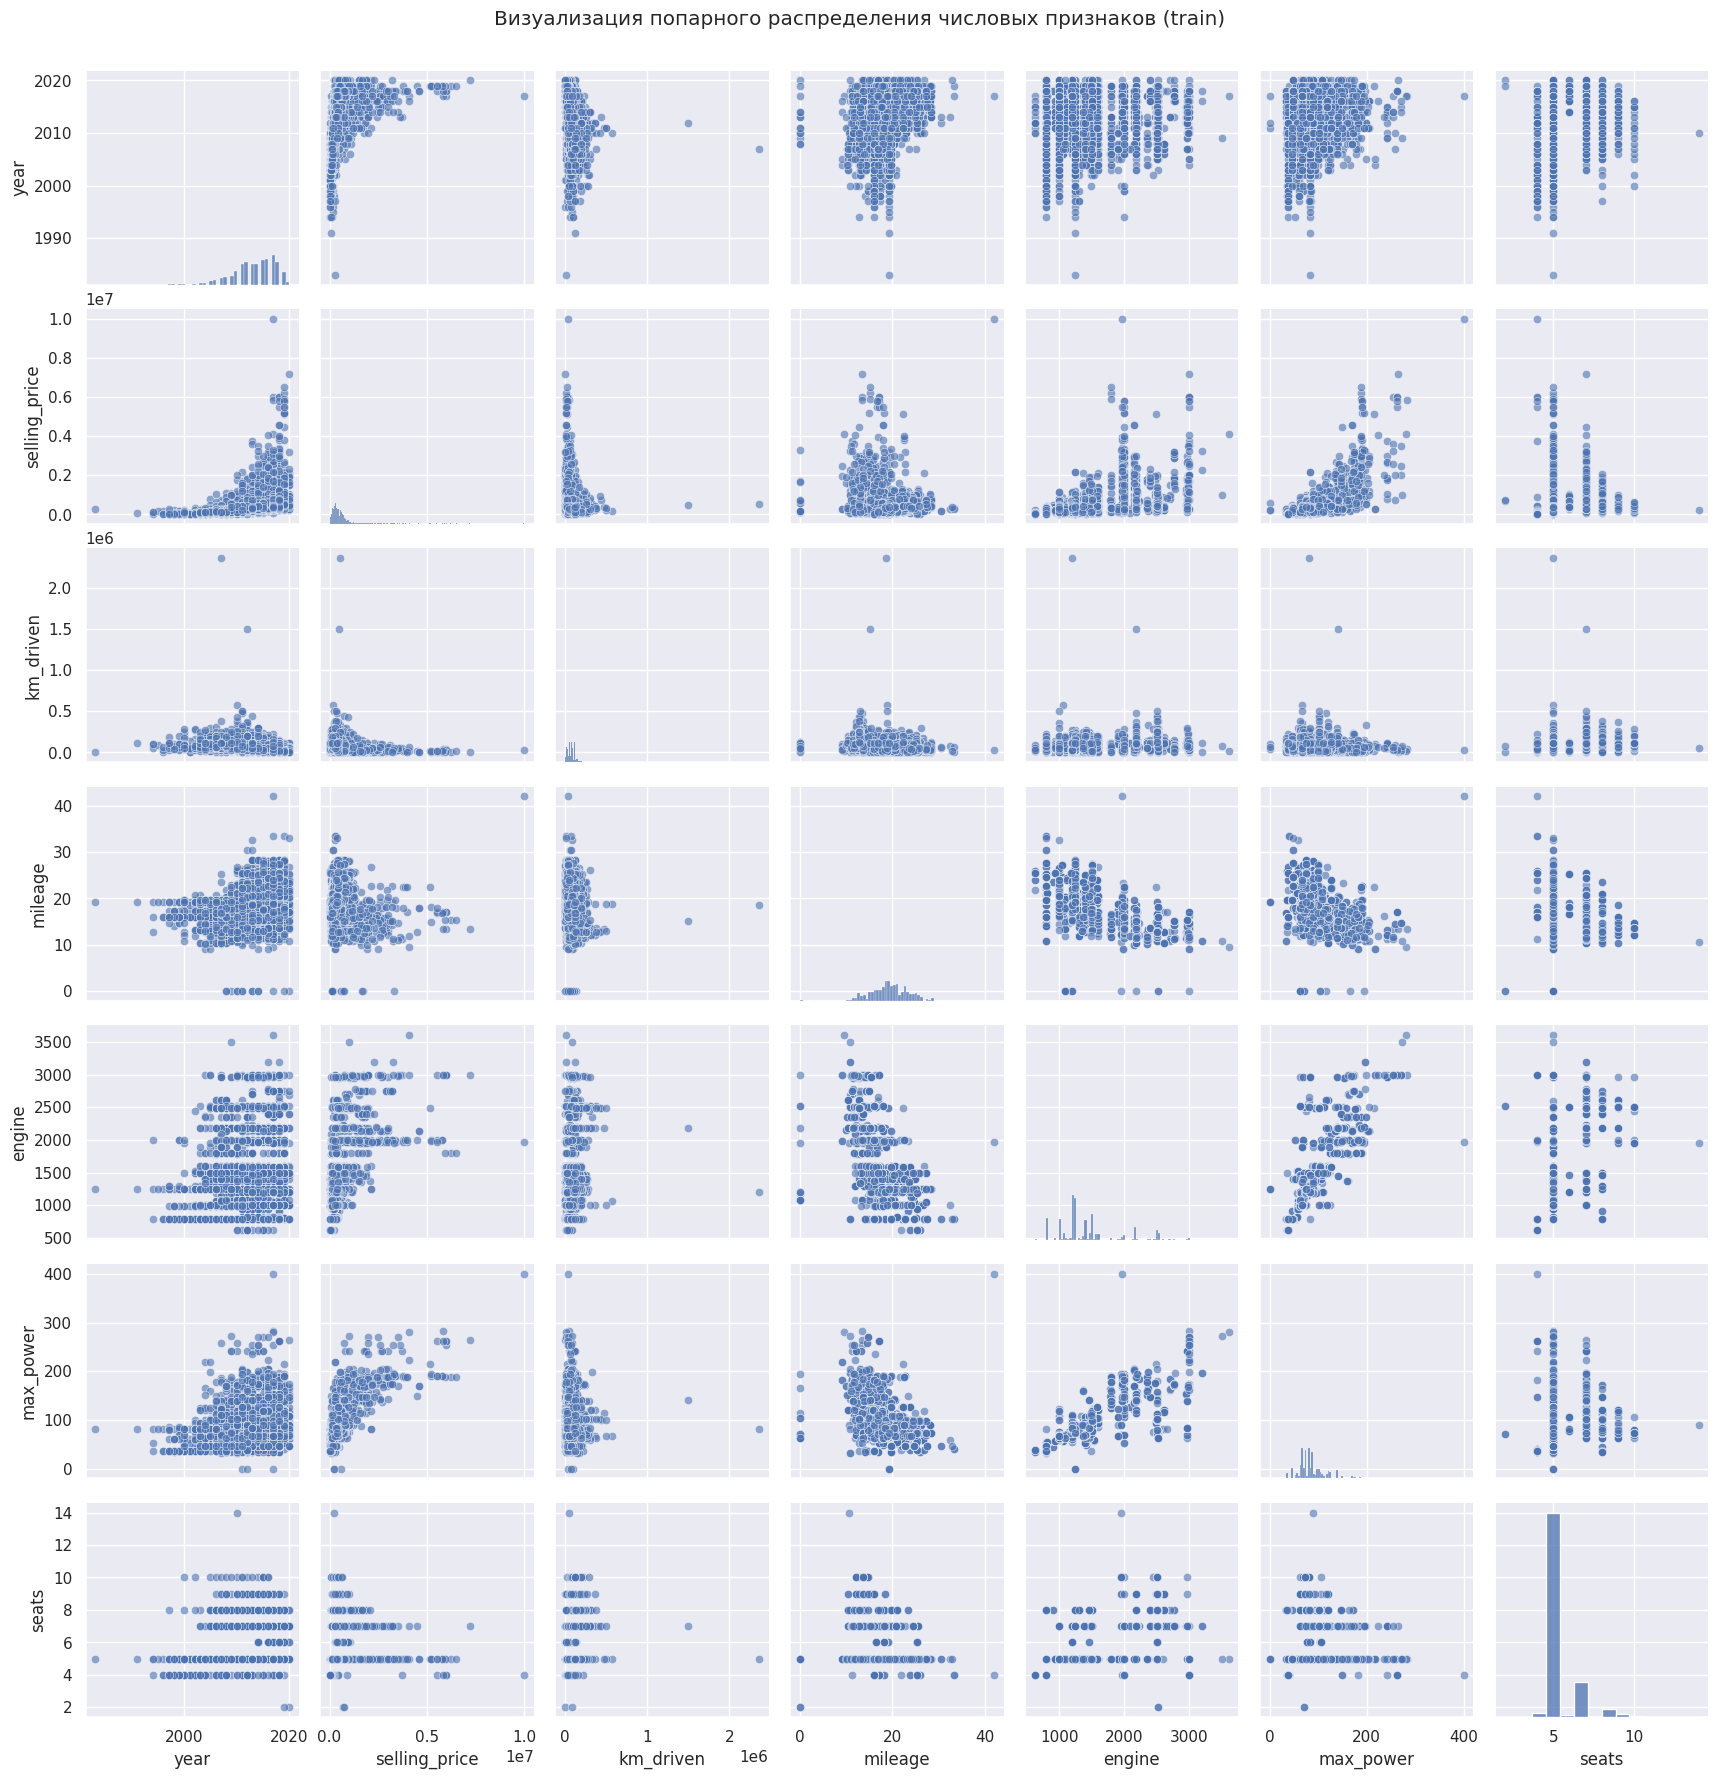

In [83]:
# Выполнение шага 1 (для train)

# Фиксируем для построения распределения только числовые столбцы, не забывая про selling_price
numeric_columns = df_train.select_dtypes(include=['number']).columns

# Выполняем построение
sns.set(style="darkgrid")
g = sns.pairplot(df_train[numeric_columns], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Визуализация попарного распределения числовых признаков (train)', y=1.02)
plt.show()

``
📌Выводы по построению попарного распределения
`df_train`

*  График `pairplot` показывает попарные распределения всех числовых признаков, включая selling_price.
На диагонали — гистограммы (распределение одного признака),
Вне диагонали — scatter-графики (как один признак связан с другим).

Выводы по зависимости selling_price от других признаков:
📈 selling_price  - year
Имеют положительную связь.
Слева внизу — машины с низкой ценой и годами, предшествующими 2000 год.
Справа вверху — машины с высокой ценой и новым годом (2015–2020).
Получается, что чем новее автомобиль (выше year) — тем выше его цена (selling_price).


📈 selling_price - km_driven
Имеют отрицательная тенденцию.
Слева вверху — машины с низким пробегом и высокой ценой.
Справа внизу — машины с высоким пробегом и низкой ценой.
Получается, что чем больше пробег (km_driven) — тем ниже цена (selling_price).


📈 selling_price - engine
Имеют условно-положительную связь, поскольку видно, что слева внизу (небольшой объем двигателя - небольшая цена), но чем больше увеличивается объем двигателя, тем более ситуация неоднозначна (вроде бы и увеличивается, но неявно)
Можно предположить, что чем больше объём двигателя (engine) — тем выше цена (selling_price).


📈 selling_price - max_power
Наблюдается положительная тенденция.
Двигатели с невысокими мощностными характеристиками имеют сравнительно меньшую стоимость.
Чем выше мощность двигателя (max_power) — тем выше цена (selling_price).


📈 selling_price - mileage
Отсутствует явная зависимость: средние величины расхода топлива имеют наибольшую цену автомобиля.


📈 selling_price - seats
Отсутствует явная зависимость
Количество мест (seats) слабо влияет на цену (selling_price).



📌Можно предположить на основе распределений связь признаков с целевой переменной?
Да.
По графикам видно, что:
year, max_power — имеют положительную зависимость с selling_price,
km_driven — имеет отрицательную зависимость,
engine, mileage, seats — слабую или отсутствующую связь.

``

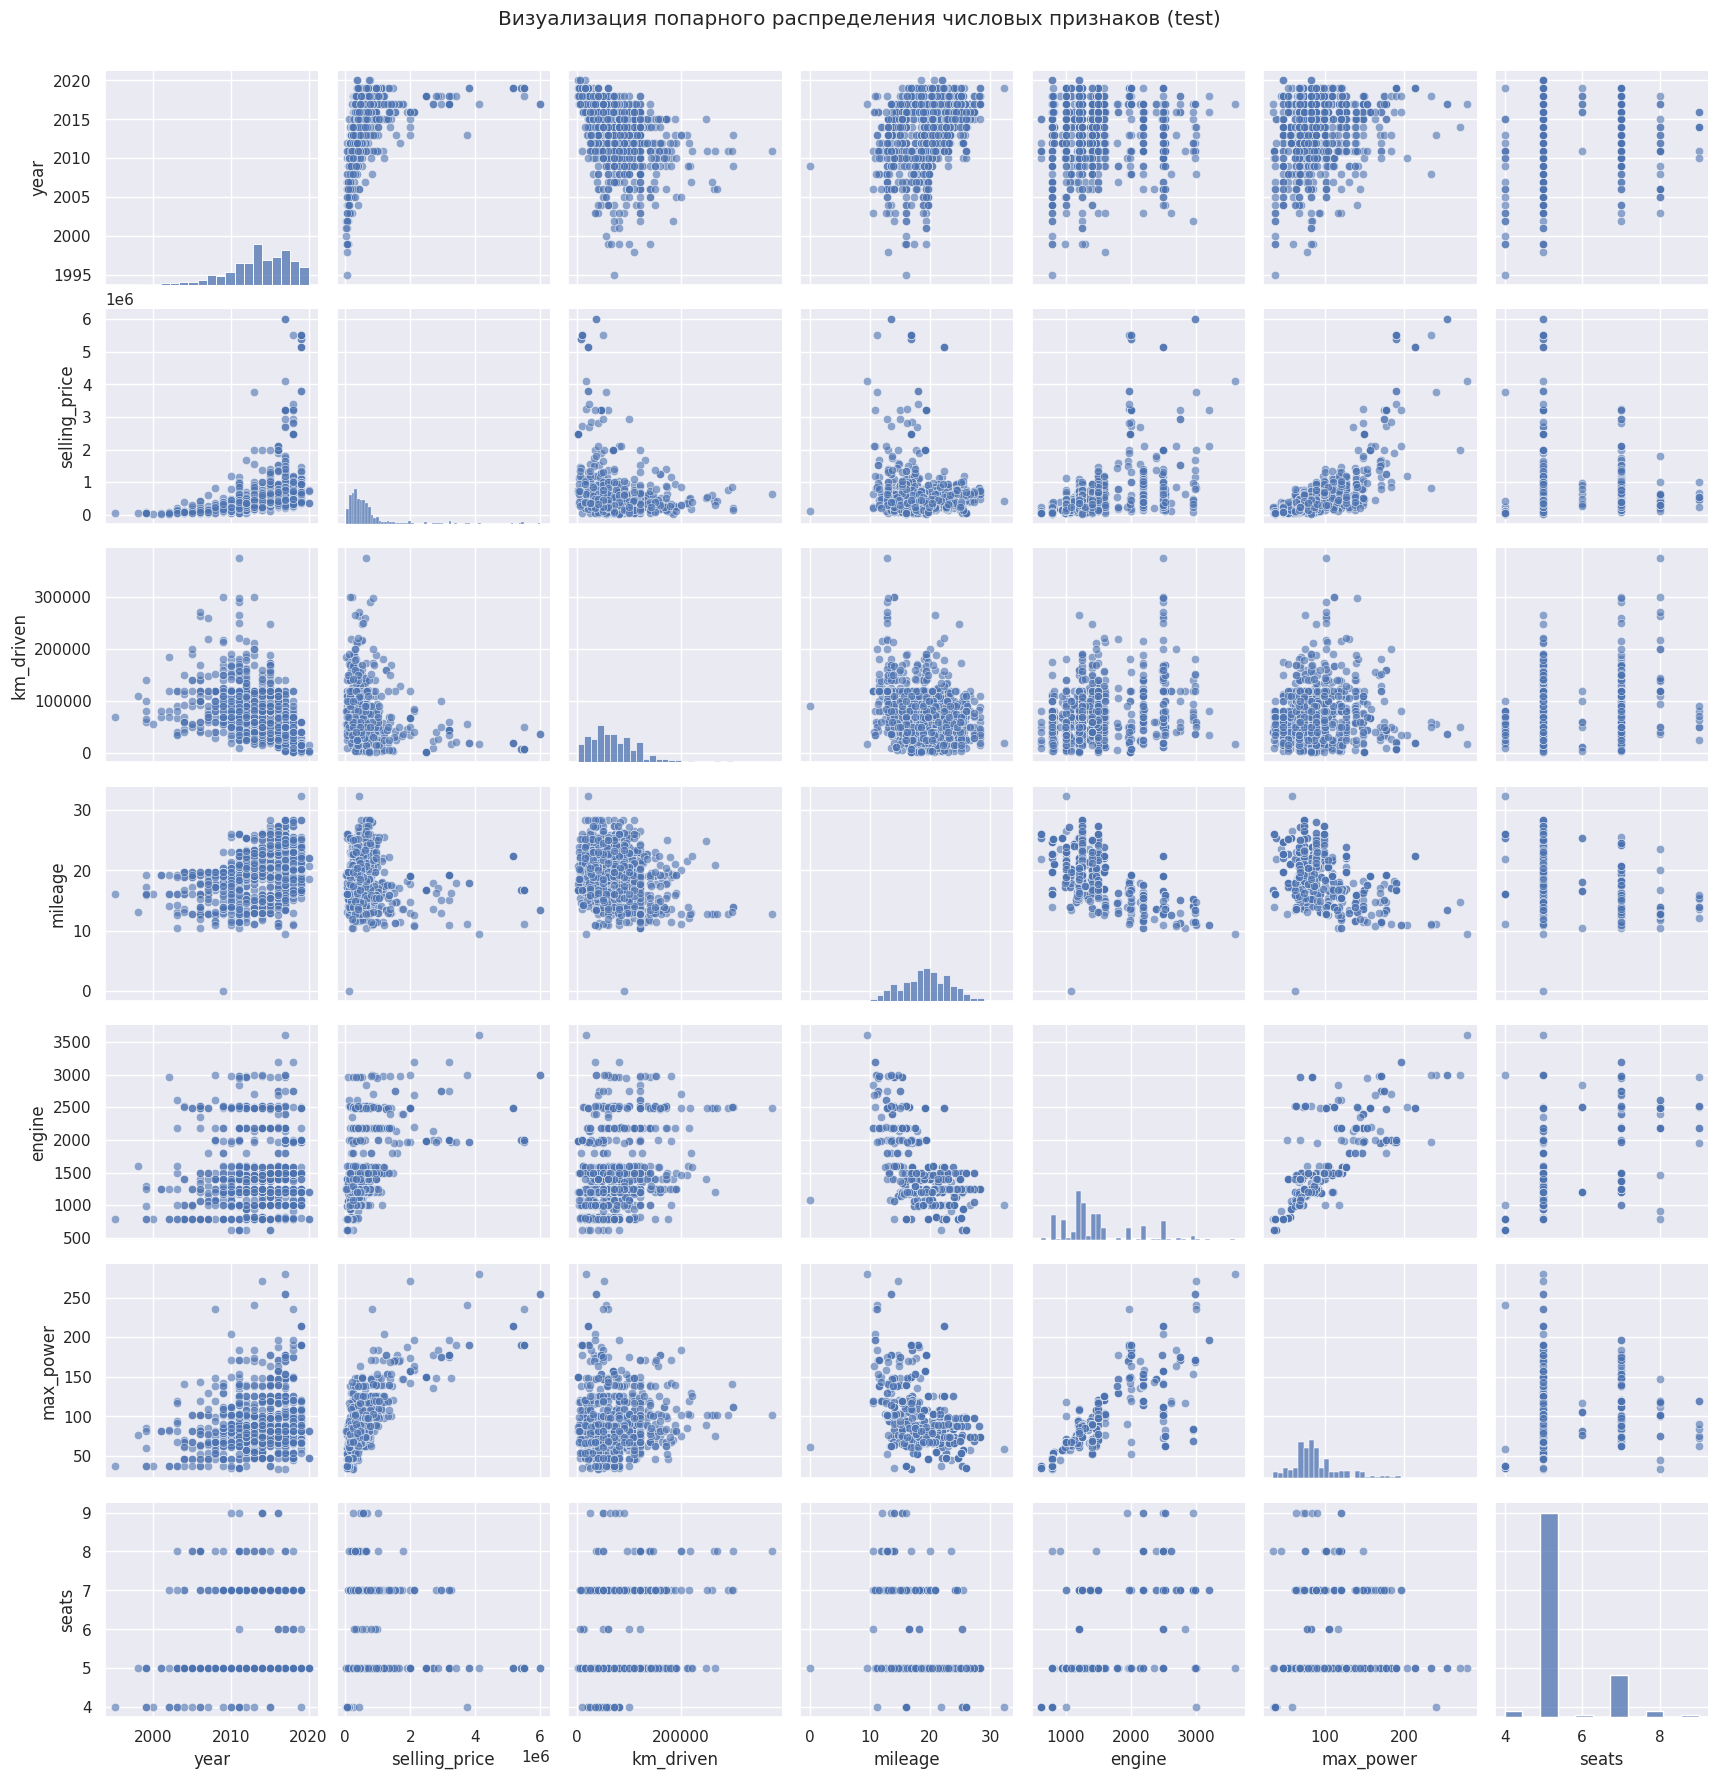

In [84]:
# Выполнение шага 2 (для test)

# Фиксируем для построения распределения только числовые столбцы
numeric_col = df_test.select_dtypes(include=['number']).columns

# Выполняем построение
sns.set(style="darkgrid")
g = sns.pairplot(df_test[numeric_col], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Визуализация попарного распределения числовых признаков (test)', y=1.02)
plt.show()

``

📌 Вывод: распределения числовых признаков в train и test в целом похожи:

Гистограммы (по диагонали) имеют схожую форму и диапазон значений.
Scatter-графики (вне диагонали) показывают схожие зависимости между признаками.
Это говорит о том, что разделение данных на train и test было выполнено корректно — и модель будет обучаться на данных, похожих на те, на которых она должна работать.

``

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- ✅ Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- ✅ По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [85]:
# Выбираем только числовые столбцы (включая selling_price)
numeric_cols = df_train.select_dtypes(include=['number']).columns

# Считаем матрицу корреляций Пирсона
corr_matrix = df_train[numeric_cols].corr()

# Выводим матрицу
corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


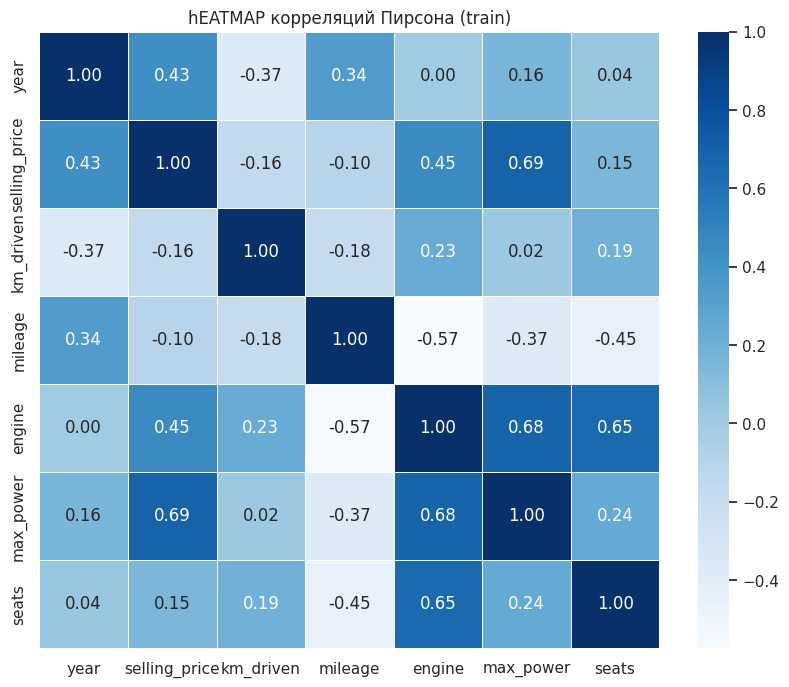

In [47]:
# Строим heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('hEATMAP корреляций Пирсона (train)')
plt.show()

- ✅ Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

``

📌 Выводы по построению корреляций:
*   Наименьшая корреляция наблюдается между признаками: year - engine, max_power - km_driven
*   Наиболее сильная положительная линейная зависимость selling_price - max_power, max_power - engine
На самом деле я думала, что корреляция с годом выпуска автомобиля будет больше, но наверное все-таки важен не сам год выпсука, сколько техничсекие характеристики автомобиля того времени и нынешнего времени
*   Утверждение верное. Коэффициент корреляции -0.37 указывает на умеренную отрицательную связь — то есть, чем старше автомобиль (меньше год), тем, скорее всего, больше километров он проехал к дате продажи.


``

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

📌 Мы выше проводили визуализации для числовых значений, ниже представлю boxplot для категориальных столбцов (зависимости стоимости автомобиля от категориальных значений).

Boxplot позволяет визуально оценить влияние категориального признака на целевую переменную (selling_price).
С его помощью можно выявить медиану цены для каждой категории, разброс значений (межквартильный размах),
наличие значений, выходящих за пределы межквартильного размаха.
Это помогает выявить: какие типы топлива, коробок передач или продавцов ассоциируются с более высокой/низкой ценой, есть ли статистически значимые различия между группами.

Boxplot показывает, что:
*  Тип топлива влияет на цену: дизель > бензин > LPG/CNG.
*  Тип коробки передач влияет на цену: автомат > механика.
*  Тип продавца влияет на цену: дилер > частное лицо.


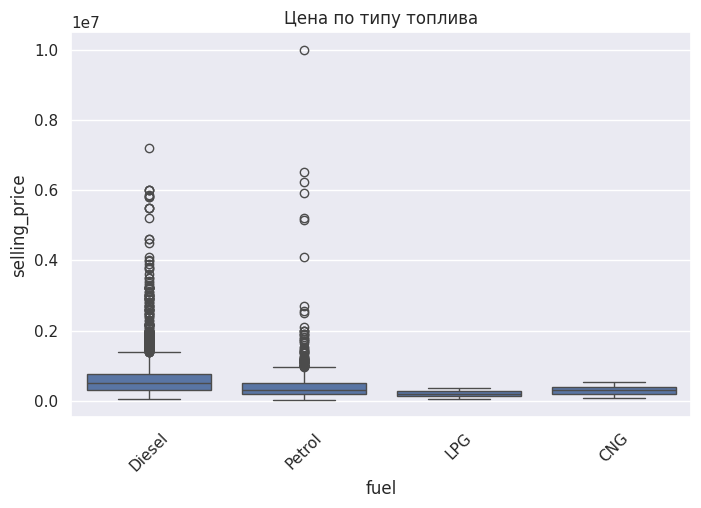

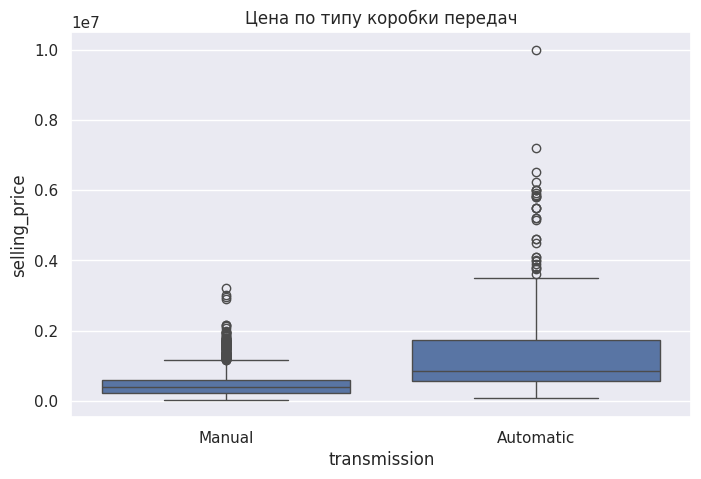

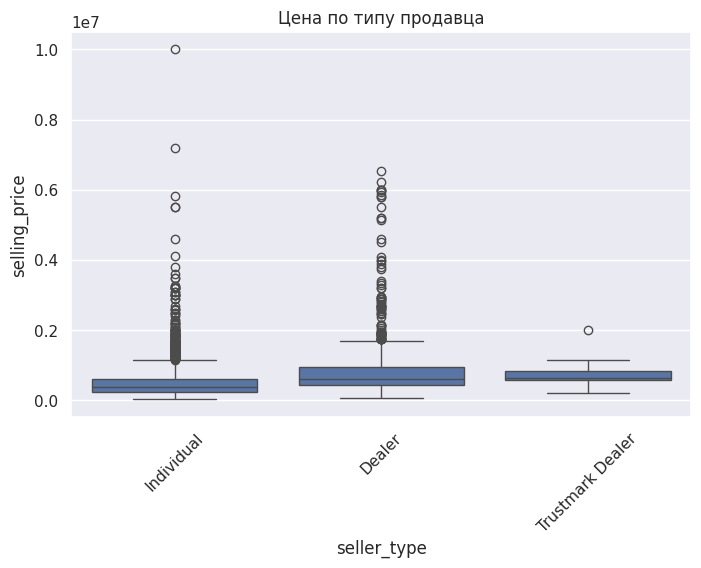

In [86]:
# 1. Тип топлива
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='fuel', y='selling_price')
plt.title('Цена по типу топлива')
plt.xticks(rotation=45)
plt.show()

# 2. Коробка передач
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='transmission', y='selling_price')
plt.title('Цена по типу коробки передач')
plt.show()

# 3. Тип продавца
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='seller_type', y='selling_price')
plt.title('Цена по типу продавца')
plt.xticks(rotation=45)
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [92]:
# Создаём копию датафрейма только с вещественными признаками, для этого создаем фильр 'number'
df_train_num = df_train.select_dtypes(include=['number']).copy()

# Выделяем целевую переменную для train
y_train = df_train_num['selling_price']
X_train = df_train_num.drop('selling_price', axis=1)


In [93]:
assert X_train.shape == (5840, 6)

In [94]:
# Проводим такие же манипуляции с тестовым датафреймом
df_test_num = df_test.select_dtypes(include=['number']).copy()

y_test = df_test_num['selling_price']
X_test = df_test_num.drop('selling_price', axis=1)

In [95]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- ✅ Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- ✅ Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
mse_train = MSE(y_train, pred_train)
mse_test = MSE(y_test, pred_test)


print(f"R² на train: {r2_train}")
print(f"R² на test: {r2_test}")
print(f"MSE на train: {mse_train}")
print(f"MSE на test: {mse_test}")


R² на train: 0.5922629595849875
R² на test: 0.5941441219017134
MSE на train: 116873067751.52162
MSE на test: 233297548204.61063


📌 Вывод: результат обучения модели является ниже среднего, но переобучения нет. MSE очень большая, но если рассчитать RMSE, то ошибка получается в районе 340 тыс.ус.ед., что со стоимость машины соизмеримо.
Но все же требуется улчушить модель.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- ✅ Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [97]:
from sklearn.preprocessing import StandardScaler

# Выбираем числовые столбцы
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Создаем и обучаем scaler на тренировочных данных
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])  # Обучаем только на train

# Применяем к тренировочным и тестовым данным
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Обучаем модель на стандартизированных данных
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Делаем предсказания
pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

# Считаем метрики
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
mse_train = MSE(y_train, pred_train)
mse_test = MSE(y_test, pred_test)

print(f"R² на train: {r2_train}")
print(f"R² на test: {r2_test}")
print(f"MSE на train: {mse_train}")
print(f"MSE на test: {mse_test}")

R² на train: 0.5922629595849875
R² на test: 0.5941441219017262
MSE на train: 116873067751.52162
MSE на test: 233297548204.6033


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- ✅ Какой признак оказался наиболее информативным в предсказании цены?

In [99]:
coefficients = model.coef_

for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")
print(f"Свободный член: {model.intercept_:.4f}")

year: 152843.26235772425
km_driven: -44148.047511036595
mileage: 28781.08659474844
engine: 61176.857149987365
max_power: 322779.7032358398
seats: -23220.570226201406
Свободный член: 522960.0911


📌 Если не брать свободный член, то наибольший коэффициент имеет max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- ✅ Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- ✅ Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [103]:
from sklearn.linear_model import Lasso

# Создаём модель Lasso
model = Lasso(alpha=1.0)

# Обучаем на стандартизированных данных
model.fit(X_train_scaled, y_train)

# Делаем предсказания
pred_train = model.predict(X_train_scaled)
pred_test = model.predict(X_test_scaled)

# Считаем метрики
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
mse_train = MSE(y_train, pred_train)
mse_test = MSE(y_test, pred_test)

print(f"R² на train: {r2_train}")
print(f"R² на test: {r2_test}")
print(f"MSE на train: {mse_train}")
print(f"MSE на test: {mse_test}")

R² на train: 0.5922285941618448
R² на test: 0.5929630205883188
MSE на train: 116882918199.30821
MSE на test: 233976478966.65192


📌 С установленным критерием alpha=1.0 L1-регуляризация не зануляет признаки. При alpha=1.0 регуляризация слишком слабая, чтобы занулить коэффициенты, все признаки оказались значимыми даже после регуляризации. При alpha=1 штраф не очень большой, модель не видит необходимости занулять коэффициенты.

А уже при alpha=10000.0, что сравнимо с масштабом коэффициенто, приводит к занулению незначительного признака - seats

In [108]:
# При альфа = 1.0

model = Lasso(alpha=1.0)
model.fit(X_train_scaled, y_train)

for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

year: 152843.08385345194
km_driven: -44146.91853784643
mileage: 28779.204084991885
engine: 61172.02578008206
max_power: 322780.58619707805
seats: -23217.69327310848


In [111]:
# При альфа = 100000.0

model = Lasso(alpha=10000.0)
model.fit(X_train_scaled, y_train)

for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

year: 151898.11359496356
km_driven: -32723.299208725177
mileage: 9238.170452283317
engine: 17841.93520050557
max_power: 329198.99021341704
seats: -0.0


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

-  ✅ Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- ✅ Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [112]:
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
}

# Созд базовую модель Lasso
lasso = Lasso()

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=10,  # 10 фолдов
    scoring='r2',  # метрика для оценки (R²)
    n_jobs=-1,
    verbose=1
)

# Обучаем GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Получаем лучшую модель
best_of_the_best_model = grid_search.best_estimator_

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² (средний по фолдам):", grid_search.best_score_)

print('--------------------------------------------')

# Получаем коэффициенты лучшей модели
coefficients = best_of_the_best_model.coef_

print('--------------------------------------------')

# Выводим
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")
print(f"Свободный член: {best_of_the_best_model.intercept_}")

# Проверяем, есть ли нулевые коэффициенты
zero_coeffs = [feature for feature, coef in zip(X_train.columns, coefficients) if abs(coef) < 1e-8]
print(f"\nЗанулились признаки: {zero_coeffs}")

print('--------------------------------------------')

# Предсказания
pred_train = best_of_the_best_model.predict(X_train_scaled)
pred_test = best_of_the_best_model.predict(X_test_scaled)

# Метрики
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)
mse_train = MSE(y_train, pred_train)
mse_test = MSE(y_test, pred_test)

print(f"\nR² на train: {r2_train:.4f}")
print(f"R² на test: {r2_test:.4f}")
print(f"MSE на train: {mse_train:.2f}")
print(f"MSE на test: {mse_test:.2f}")

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Лучшие параметры: {'alpha': 10000.0}
Лучший R² (средний по фолдам): 0.5727300261493131
--------------------------------------------
--------------------------------------------
year: 151898.11359496356
km_driven: -32723.299208725177
mileage: 9238.170452283317
engine: 17841.93520050557
max_power: 329198.99021341704
seats: -0.0
Свободный член: 522960.09109588683

Занулились признаки: ['seats']
--------------------------------------------

R² на train: 0.5893
R² на test: 0.5816
MSE на train: 117735529384.66
MSE на test: 240512206991.90


📌 Ответы на вопросы:
*   Грид-сёрчу пришлось обучать моделей 80 моделей — потому что 8 значений alpha × 10 фолдов = 80
*   Лучший коэффициент регуляризации - альфа = 10000.0, занулился признак seats, как наименее значимый (в пункте ранее  уже предполагала такой коффициент, seats уже зануляла)

**Ваша задача 2:**

- ✅ Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- ✅ Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [114]:
from sklearn.linear_model import ElasticNet

# Сетка параметров
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
    'l1_ratio': [0.1, 0.5, 0.9]  # 10% L1, 50% L1, 90% L1
}


# Создаембазовую модель ElasticNet
elastic_net = ElasticNet()

# Создаем GridSearchCV
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,  # 10 фолдов
    scoring='r2',  # метрика для оценки
    n_jobs=-1,
    verbose=1
)

# Обучаем GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² (средний по фолдам):", grid_search.best_score_)

# Получаем коэффициенты
coefficients = best_model.coef_

# Выводим с названиями признаков
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Свободный член: {best_model.intercept_:.4f}")

# Проверяем, занулились ли признаки
zero_coeffs = [feature for feature, coef in zip(X_train.columns, coefficients) if abs(coef) < 1e-8]
print(f"\nЗанулились признаки: {zero_coeffs}")

Fitting 10 folds for each of 21 candidates, totalling 210 fits
Лучшие параметры: {'alpha': 1.0, 'l1_ratio': 0.9}
Лучший R² (средний по фолдам): 0.5761378555173832
year: 146041.1146
km_driven: -46021.2157
mileage: 22845.7627
engine: 79237.7264
max_power: 281536.6582
seats: -24516.3961
Свободный член: 522960.0911

Занулились признаки: []


Ответы на вопросы:
*  Грин-сёерчу пришлось обучать 210 моделей (потому что 7 значений alpha × 3 значения l1_ratio х 10 фолдов)

* Лучший параметр отмечен как альфа = 1.0, l1_ratio = 0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- ✅ Удалить столбец`name`

In [121]:
# Создаём копию X_train
X_train_cat = X_train.copy()

# Удаляем name из df_train и df_test
if 'name' in df_train.columns:
    df_train = df_train.drop('name', axis=1)

if 'name' in df_test.columns:
    df_test = df_test.drop('name', axis=1)

# Проверяем
print("Столбцы в train:", df_train.columns.tolist())
print("Столбцы in test:", df_test.columns.tolist())


Столбцы в train: ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
Столбцы in test: ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- ✅ Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [122]:
assert X_train_cat.shape == (5840, 10)

AssertionError: 

In [124]:
df_train.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- ✅ Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [125]:
from sklearn.preprocessing import OneHotEncoder

# Выбираем категориальные столбцы (кроме seats)
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Создаём энкодер
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Обучаем на train и трансформируем train и test
X_train_encoded = encoder.fit_transform(df_train[cat_cols])
X_test_encoded = encoder.transform(df_test[cat_cols])

# Получаем названия новых столбцов
feature_names = encoder.get_feature_names_out(cat_cols)

# Создаём датафреймы с новыми столбцами
X_train_dummies = pd.DataFrame(X_train_encoded, columns=feature_names, index=df_train.index)
X_test_dummies = pd.DataFrame(X_test_encoded, columns=feature_names, index=df_test.index)

# Объединяем с числовыми признаками
X_train_final = pd.concat([df_train.select_dtypes(include=['number']).drop('selling_price', axis=1), X_train_dummies], axis=1)
X_test_final = pd.concat([df_test.select_dtypes(include=['number']), X_test_dummies], axis=1)

# Проверяем размерность
print("Форма X_train_final:", X_train_final.shape)
print("Форма X_test_final:", X_test_final.shape)

Форма X_train_final: (5840, 16)
Форма X_test_final: (1000, 17)


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- ✅ Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- ✅ Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [126]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
}

# Создаём модель Ridge
ridge = Ridge()

# Создаём GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,  # 10 фолдов
    scoring='r2',  # метрика для оценки
    n_jobs=-1,
    verbose=1
)

# Обучаем GridSearchCV на стандартизированных данных
grid_search.fit(X_train_scaled, y_train)

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Выводим лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R² (средний по фолдам):", grid_search.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
Лучшие параметры: {'alpha': 1000.0}
Лучший R² (средний по фолдам): 0.5762362434626459


📌 Качество не удалось улучшить...

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [130]:
# Код сгенерирвоан при помощи нейросети
# Результаты обучения разными методами удовлетворительные

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# Обучаем Ridge
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, cv=10, scoring='r2')
grid_search_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_search_ridge.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)

# Обучаем Lasso
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, cv=10, scoring='r2')
grid_search_lasso.fit(X_train_scaled, y_train)
best_lasso = grid_search_lasso.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)

# Обучаем ElasticNet
elastic = ElasticNet()
grid_search_elastic = GridSearchCV(elastic, param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.1, 0.5, 0.9]}, cv=10, scoring='r2')
grid_search_elastic.fit(X_train_scaled, y_train)
best_elastic = grid_search_elastic.best_estimator_
elastic_pred = best_elastic.predict(X_test_scaled)

# Определяем бизнес-метрику
def business_metric(y_true, y_pred):
    abs_diff_percent = np.abs((y_true - y_pred) / y_true) * 100
    within_10_percent = (abs_diff_percent <= 10)
    return np.mean(within_10_percent)

# Считаем метрики
ridge_business_score = business_metric(y_test, ridge_pred)
lasso_business_score = business_metric(y_test, lasso_pred)
elastic_business_score = business_metric(y_test, elastic_pred)

# Выводим результаты
print(f"Ridge: {ridge_business_score:.4f}")
print(f"Lasso: {lasso_business_score:.4f}")
print(f"ElasticNet: {elastic_business_score:.4f}")

Ridge: 0.2240
Lasso: 0.2270
ElasticNet: 0.2410


`Лучше всего решает задачу ElasticNet`

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
